In [1]:
import os
import math
import numpy as np
import pandas as pd
import seaborn as sns

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
train_variants_df = pd.read_csv("training_variants")
test_variants_df = pd.read_csv("test_variants")
train_text_df = pd.read_csv("training_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
test_text_df = pd.read_csv("test_text", sep="\|\|", engine="python", skiprows=1, names=["ID", "Text"])
print("Train Variant".ljust(15), train_variants_df.shape)
print("Train Text".ljust(15), train_text_df.shape)
print("Test Variant".ljust(15), test_variants_df.shape)
print("Test Text".ljust(15), test_text_df.shape)

Train Variant   (3321, 4)
Train Text      (3321, 2)
Test Variant    (5668, 3)
Test Text       (5668, 2)


In [3]:
train_variants_df.head()

,ID,Gene,Variation,Class
0,0,FAM58A,Truncating Mutations,1
1,1,CBL,W802*,2
2,2,CBL,Q249E,2
3,3,CBL,N454D,3
4,4,CBL,L399V,4


In [4]:
print("For training data, there are a total of", len(train_variants_df.ID.unique()), "IDs,", end='')
print(len(train_variants_df.Gene.unique()), "unique genes,", end='')
print(len(train_variants_df.Variation.unique()), "unique variations and ", end='')
print(len(train_variants_df.Class.unique()),  "classes")

For training data, there are a total of 3321 IDs,264 unique genes,2996 unique variations and 9 classes


In [5]:
print("For test data, there are a total of", len(test_variants_df.ID.unique()), "IDs,", end='')
print(len(test_variants_df.Gene.unique()), "unique genes,", end='')
print(len(test_variants_df.Variation.unique()), "unique variations")

For test data, there are a total of 5668 IDs,1397 unique genes,5628 unique variations


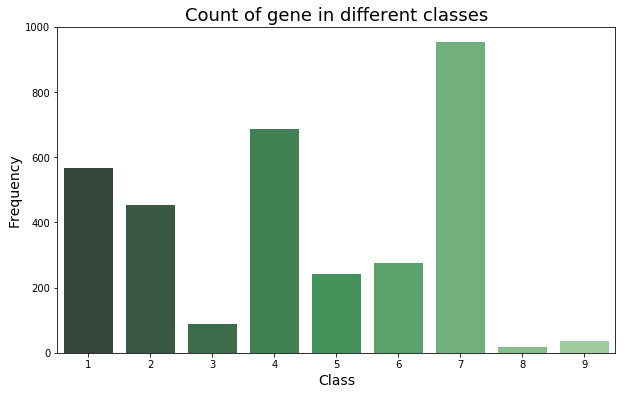

In [6]:
plt.figure(figsize=(10,6))
sns.countplot(x="Class", data=train_variants_df, palette="Greens_d")
plt.ylabel('Frequency', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Count of gene in different classes", fontsize=18)
plt.show()

Peak at class 7. Lowest occurence class is 8 and 9.

In [10]:
gene_group = train_variants_df.groupby("Gene")['ID'].count()
print("Genes with maximal occurences", gene_group.sort_values(ascending=False)[:10])

Genes with maximal occurences Gene
BRCA1     264
TP53      163
EGFR      141
PTEN      126
BRCA2     125
KIT        99
BRAF       93
ERBB2      69
ALK        69
PDGFRA     60
Name: ID, dtype: int64


#### Plot top 10 genes

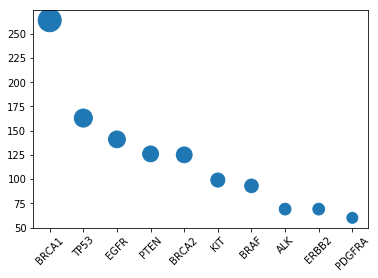

In [11]:
x = gene_group.reset_index()
y = x.sort_values(by='ID', ascending=False)[:10]
y['rank'] = [1,2,3,4,5,6,7,8,9,10]

ticks = [1,2,3,4,5,6,7,8,9,10]
labels = y['Gene'].values

fig, ax1 = plt.subplots(1,1)
plt.scatter(x='rank', y='ID', s=2*y.ID.values, data=y)
ax1.set_xticks(ticks)
ax1.set_xticklabels(labels, minor=False, rotation=45)

#### Top seven genes distribution in different classes

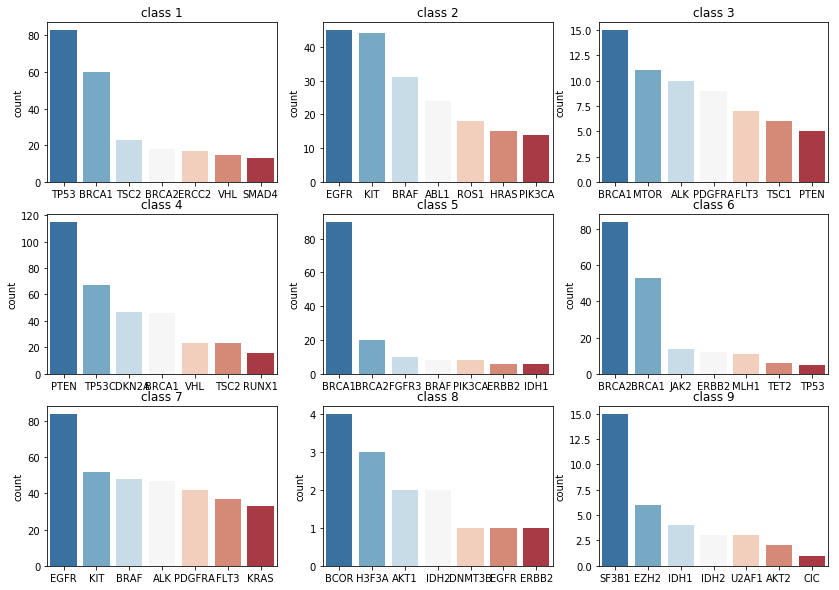

In [16]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(14,10))

for i in range(3):
    for j in range(3):
        gene_count_grp = train_variants_df[train_variants_df["Class"]==((i*3+j)+1)].groupby('Gene')["ID"].count().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('ID', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        figure = sns.barplot(x="Gene", y="ID", data=sorted_gene_group_top_7,palette="RdBu_r", ax=axs[i][j])
        figure.set_title('class ' + str((i*3+j)+1))
        figure.set_xlabel('')
        figure.set_ylabel('count')

EGFR rank first in class 2 abd 7. BRCA1 ranks first inclass 3, 5 and ranks second in class 6. BRCA2 ranks first in class 6 and ranks second in 5.

#### Top 10 variations

In [21]:
variation_group = train_variants_df.groupby("Variation")['Variation'].count()
print("Variations with maximal occurences", variation_group.sort_values(ascending=False)[:10])

Variations with maximal occurences Variation
Truncating Mutations    93
Deletion                74
Amplification           71
Fusions                 34
Overexpression           6
G12V                     4
E17K                     3
T58I                     3
Q61L                     3
Q61R                     3
Name: Variation, dtype: int64


#### Top 10 variations classe distribution

In [25]:
top_10_variants = pd.DataFrame(variation_group.sort_values(ascending=False)[:10])
variants_slice = train_variants_df[train_variants_df['Variation'].isin(list(top_10_variants.index))]
variants_slice.shape

(294, 4)

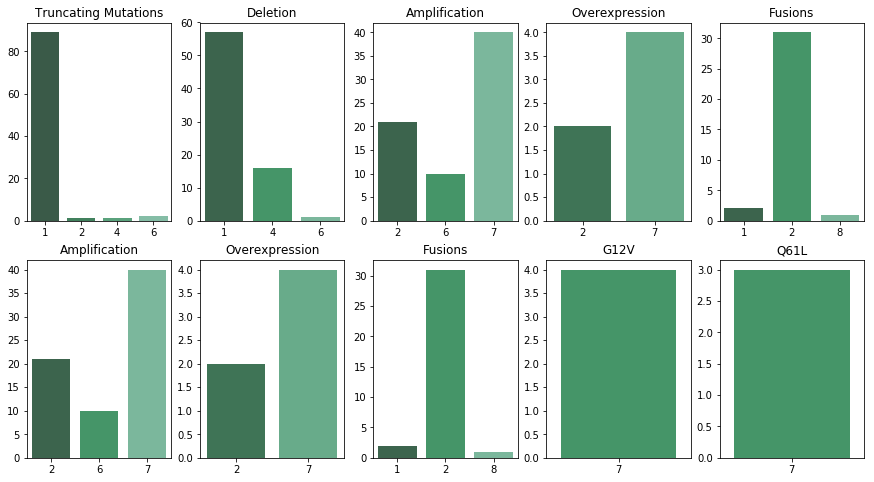

In [26]:
fig, axs = plt.subplots(ncols=5, nrows=2, figsize=(15,8))

for i in range(2):
    for j in range(5):
        variation_count_grp = variants_slice[variants_slice['Variation'] == variants_slice.Variation.unique() [(i*2+j)]].groupby('Class')['ID'].count().reset_index()
        figure = sns.barplot(x="Class", y="ID", data=variation_count_grp, palette="BuGn_d", ax=axs[i][j])
        figure.set_title(variants_slice.Variation.unique() [(i*2+j)])
        figure.set_xlabel('')
        figure.set_ylabel('')

#### Variations in different classes

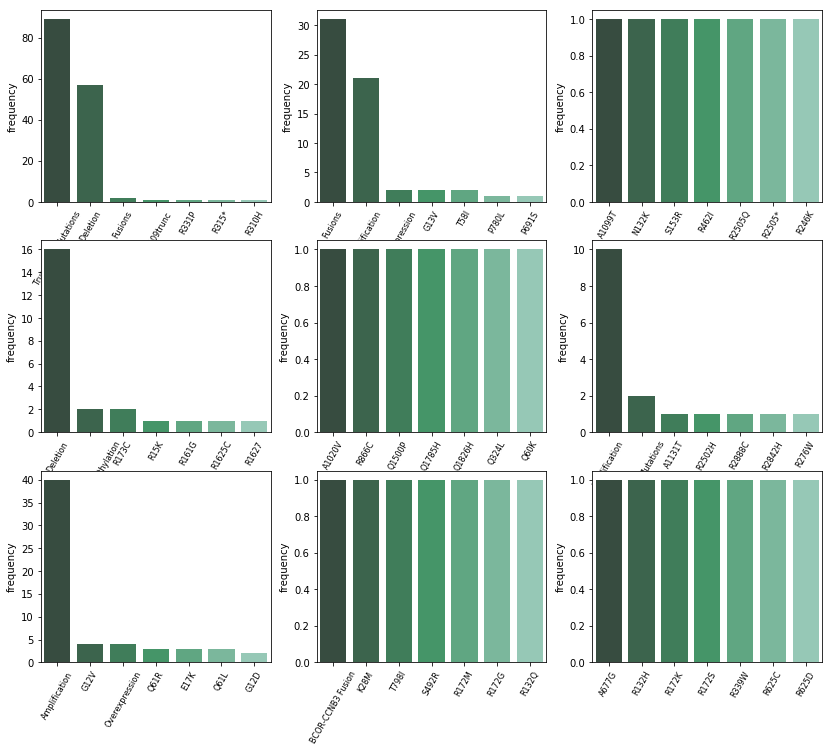

In [22]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(14,12))

for i in range(3):
    for j in range(3):
        variation_count_grp = train_variants_df[train_variants_df["Class"]==((i*3+j)+1)].groupby('Variation')["ID"].count().reset_index()
        sorted_variation_group = variation_count_grp.sort_values('ID', ascending=False)
        sorted_variation_group_top_7 = sorted_variation_group[:7]
        figure = sns.barplot(x="Variation", y="ID", data=sorted_variation_group_top_7, palette="BuGn_d", ax=axs[i][j])
        figure.set_xlabel('')
        figure.set_ylabel('frequency')
for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=60, fontsize=8)

Class 3, 5, 8, 9 the maximum gene variation is 1. Amplification ranks first in class 6 and 7.

#### Combining the train_variants file with train_text file

In [27]:
train_text_df.head()

,ID,Text
0,0,Cyclin-dependent kinases (CDKs) regulate a var...
1,1,Abstract Background Non-small cell lung canc...
2,2,Abstract Background Non-small cell lung canc...
3,3,Recent evidence has demonstrated that acquired...
4,4,Oncogenic mutations in the monomeric Casitas B...


In [42]:
train_text_df.loc[:, 'Text_count']  = train_text_df["Text"].apply(lambda x: len(x.split()))
train_text_df.head()

,ID,Text,Text_count
0,0,Cyclin-dependent kinases (CDKs) regulate a var...,6089
1,1,Abstract Background Non-small cell lung canc...,5722
2,2,Abstract Background Non-small cell lung canc...,5722
3,3,Recent evidence has demonstrated that acquired...,5572
4,4,Oncogenic mutations in the monomeric Casitas B...,6202


In [43]:
train_full = train_variants_df.merge(train_text_df, how="inner", left_on="ID", right_on="ID")
train_full[train_full["Class"]==1].head()

,ID,Gene,Variation,Class,Text,Text_count
0,0,FAM58A,Truncating Mutations,1,Cyclin-dependent kinases (CDKs) regulate a var...,6089
7,7,CBL,Deletion,1,CBL is a negative regulator of activated recep...,14683
16,16,CBL,Truncating Mutations,1,To determine if residual cylindrical refractiv...,8118
37,37,DICER1,D1709E,1,Sex cord鈥搒tromal tumors and germ-cell tumors a...,2710
38,38,DICER1,D1709A,1,Sex cord鈥搒tromal tumors and germ-cell tumors a...,2710


In [44]:
count_grp = train_full.groupby('Class')["Text_count"]
count_grp.describe()

,count,mean,std,min,25%,50%,75%,max
Class,,,,,,,,
1,568.0,9444.545775,6513.469240,1.0,4970.00,7286.5,12868.25,52969.0
2,452.0,9306.261062,7624.222077,116.0,4184.25,6810.0,12209.50,61923.0
3,89.0,6751.123596,3724.401696,1737.0,4283.00,5572.0,7415.00,27371.0
4,686.0,8978.188047,7276.221057,53.0,4566.00,6351.0,11521.75,43893.0
5,242.0,7504.409091,3890.285827,183.0,5245.00,6451.0,9513.50,24214.0
6,275.0,7143.058182,3827.958077,1.0,4505.50,6587.0,7626.00,24597.0
7,953.0,11437.771249,10105.042389,1.0,4871.00,8254.0,14619.00,76708.0
8,19.0,10810.105263,5645.073662,2111.0,5586.00,11237.0,15535.00,20612.0
9,37.0,12798.567568,10208.668344,1146.0,4942.00,10917.0,15797.00,45126.0


In [45]:
train_full[train_full["Text_count"]==1.0]

,ID,Gene,Variation,Class,Text,Text_count
1109,1109,FANCA,S1088F,1,null,1
1277,1277,ARID5B,Truncating Mutations,1,null,1
1407,1407,FGFR3,K508M,6,null,1
1639,1639,FLT1,Amplification,6,null,1
2755,2755,BRAF,G596C,7,null,1


#### Text length distribution

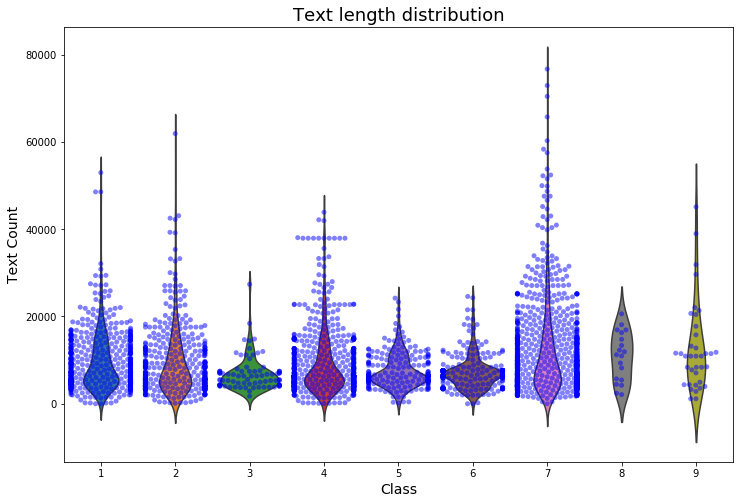

In [46]:
plt.figure(figsize=(12,8))
gene_count_grp = train_full.groupby('Gene')["Text_count"].sum().reset_index()
sns.violinplot(x="Class", y="Text_count", data=train_full, inner=None)
sns.swarmplot(x="Class", y="Text_count", data=train_full, color="b", alpha=.5);
plt.ylabel('Text Count', fontsize=14)
plt.xlabel('Class', fontsize=14)
plt.title("Text length distribution", fontsize=18)
plt.show()

#### Mean text count by genes in different classes

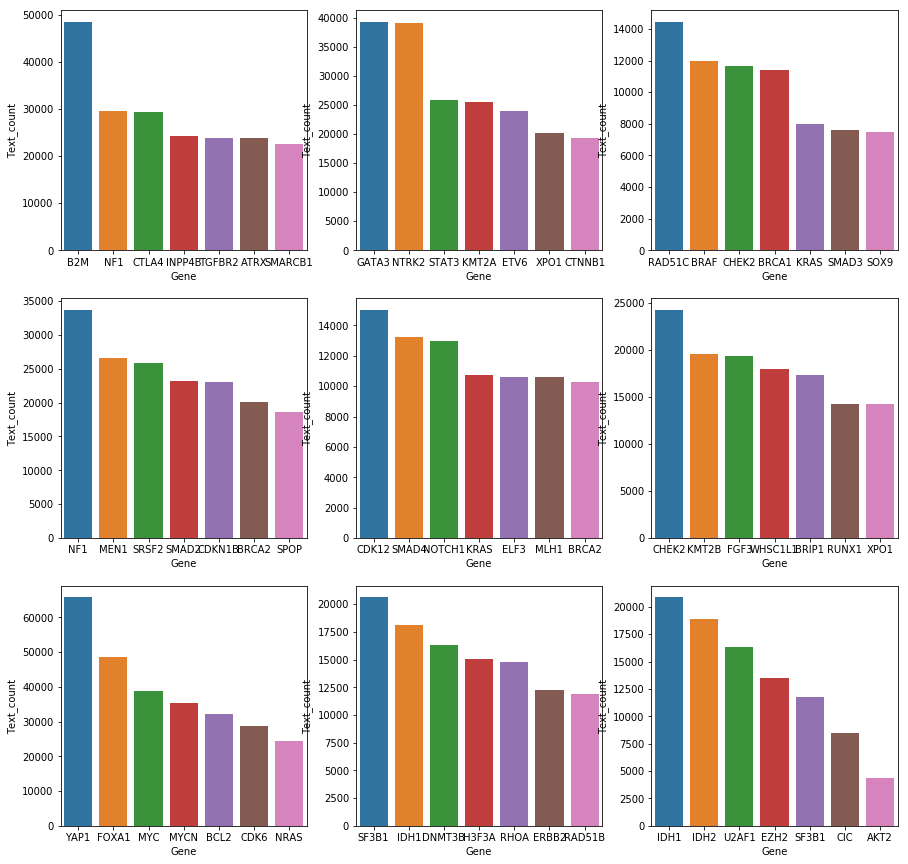

In [47]:
fig, axs = plt.subplots(ncols=3, nrows=3, figsize=(15,15))

for i in range(3):
    for j in range(3):
        gene_count_grp = train_full[train_full["Class"]==((i*3+j)+1)].groupby('Gene')["Text_count"].mean().reset_index()
        sorted_gene_group = gene_count_grp.sort_values('Text_count', ascending=False)
        sorted_gene_group_top_7 = sorted_gene_group[:7]
        sns.barplot(x="Gene", y="Text_count", data=sorted_gene_group_top_7, ax=axs[i][j])



Frequently occurring terms for each class




We need to know more about text. Tf-idf is known as one good technique to use for text transformation and get good features out of text for training our machine learning model. Here you can find more details about tf-idf and some useful code snippets.


#### Start with a simple baseline. Bag of words

In [143]:
from sklearn.feature_extraction.text import CountVectorizer
import nltk
import gensim
count_vectorizer = CountVectorizer(
    analyzer="word", tokenizer=nltk.word_tokenize,
    preprocessor=None, stop_words='english', max_features=None)

In [149]:
bag_of_words = count_vectorizer.fit_transform(train_full['Text'])

In [151]:
train_full.Text_count.sum()

31690362

In [150]:
def make_xy(df, vectorizer=None):
    #Your code here    
    if vectorizer is None:
        vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(df.Text)
    X = X.tocsc()  # some versions of sklearn return COO format
    y = df.Class.values
    return X, y

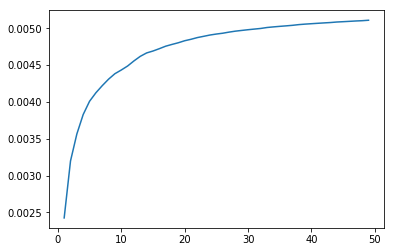

In [152]:
#set up seaborn style
sns.set_style("whitegrid")
sns.set_context("poster")

vectorizer = CountVectorizer(min_df=1)
X,y = make_xy(train_full,vectorizer=vectorizer)
dfs = []
for i in range(1,50):
    vectorizer = CountVectorizer(max_df=i)
    X,y = make_xy(train_full,vectorizer=vectorizer)
    dfs.append(X.shape[1])
dfs_percent = [df/31690362 for df in dfs]
plt.plot(range(1,50),dfs_percent)

In [153]:
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
import gensim

In [163]:

import scikitplot as skplt
def evaluate_features(X, y, clf=None):
    """General helper function for evaluating effectiveness of passed features in ML model
    
    Prints out Log loss, accuracy, and confusion matrix with 3-fold stratified cross-validation
    
    Args:
        X (array-like): Features array. Shape (n_samples, n_features)
        
        y (array-like): Labels array. Shape (n_samples,)
        
        clf: Classifier to use. If None, default Log reg is use.
    """
    if clf is None:
        clf = LogisticRegression()
    
    probas = cross_val_predict(clf, X, y, cv=StratifiedKFold(random_state=8), 
                              n_jobs=-1, method='predict_proba', verbose=2)
    pred_indices = np.argmax(probas, axis=1)
    classes = np.unique(y)
    preds = classes[pred_indices]
    print('Log loss: {}'.format(log_loss(y, probas)))
    print('Accuracy: {}'.format(accuracy_score(y, preds)))
    skplt.metrics.plot_confusion_matrix(y, preds, normalize=True)

In [155]:
len(count_vectorizer.get_feature_names())

287774

In [156]:
svd = TruncatedSVD(n_components=25, n_iter=25, random_state=12)
truncated_bag_of_words = svd.fit_transform(bag_of_words)

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:    5.1s finished


Log loss: 2.2556854419234416
Accuracy: 0.31285757302017464


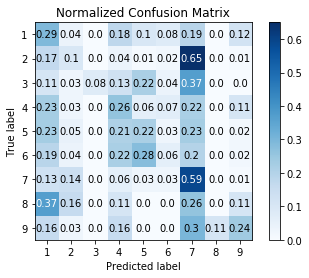

In [164]:
evaluate_features(truncated_bag_of_words, train_full['Class'].values.ravel())

[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:   12.1s finished


Log loss: 1.7316646116690564
Accuracy: 0.35953026196928634


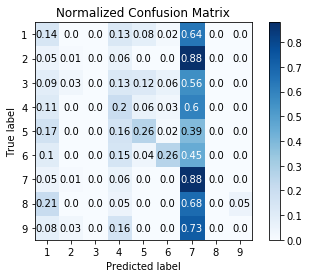

In [165]:
evaluate_features(truncated_bag_of_words, train_full['Class'].values.ravel(), 
                  RandomForestClassifier(n_estimators=1000, max_depth=5, verbose=1))